In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("loan_applications.csv")
df


,application_id,application_name,simulation_id,partenaire_bancaire_id,interlocuteurs_id,banque_id,created_at,updated_at,commentaire,etape,...,property_2_purchase_year,property_2_purchase_price,property_2_current_value,property_2_remaining_debt,property_3_type,property_3_location,property_3_purchase_year,property_3_purchase_price,property_3_current_value,property_3_remaining_debt
0,5892,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,21,282,11,2021-09-13 17:52:42,2022-01-18 12:21:02,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7754,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,70,123,5,2021-12-08 14:40:55,2021-12-08 14:41:57,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7755,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,22,30,13,2021-12-08 14:41:29,2021-12-08 14:42:13,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6385,DDP - ATINDOKPO Benjamin / AWOUNOU SEDE,82385,21,29,11,2021-10-08 09:56:46,2021-10-23 07:12:25,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5384,DDP - SACAMA-ISIDORE Franck / FARGUES Déborah,82850,20,272,14,2021-08-04 07:34:26,2021-09-18 06:35:18,NaN,5,...,NaN,265932.0,265932.0,163551.0,NaN,NaN,NaN,197431.0,197431.0,204010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,34767,DDP - MONTIÉ Victoria,111110,1499,1857,182,2025-07-17 16:29:55,2025-07-30 09:35:02,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,35011,DDP - MONTIÉ Victoria,111110,1434,1788,11,2025-07-29 09:55:26,2025-07-30 09:39:59,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,35013,DDP - CROUZET Kevin / CATALANO Amélie,111173,1437,1791,108,2025-07-29 10:08:26,2025-07-29 15:39:59,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,35062,DDP - MAHENDRARAJAH Umesh / MAHENDRARAJAH Vigitha,111347,1511,1870,11,2025-07-31 11:18:15,2025-07-31 17:17:18,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
bank = pd.read_json("banks.json")
bank

,id,name
0,1,AXA
1,2,ING
2,3,CREDIT AGRICOLE BRIE PICARDIE
3,4,CFCAL VEGALIS
4,5,LCL
...,...,...
186,190,Crédit Mutuel Anjou
187,191,Crédit Mutuel Massif Central
188,192,Crédit Mutuel Antilles-Guyane
189,193,Crédit Mutuel Nord Europe


In [3]:
df = pd.merge(
    df,
    bank[['id', 'name']],
    left_on='banque_id',
    right_on='id',
    how='left'
).drop(columns=['id']).rename(columns={'name': 'bank_name'})

In [4]:
simulation = pd.read_json("simulations.json")
df = pd.merge(
    df,
    simulation[['simulation_id', 'name']].rename(columns={'name': 'simulation_name'}),
    on='simulation_id',
    how='left'
)
df

,application_id,application_name,simulation_id,partenaire_bancaire_id,interlocuteurs_id,banque_id,created_at,updated_at,commentaire,etape,...,property_2_current_value,property_2_remaining_debt,property_3_type,property_3_location,property_3_purchase_year,property_3_purchase_price,property_3_current_value,property_3_remaining_debt,bank_name,simulation_name
0,5892,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,21,282,11,2021-09-13 17:52:42,2022-01-18 12:21:02,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAISSE D'EPARGNE IDF,Confirmation de mandat
1,7754,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,70,123,5,2021-12-08 14:40:55,2021-12-08 14:41:57,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCL,Confirmation de mandat
2,7755,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,22,30,13,2021-12-08 14:41:29,2021-12-08 14:42:13,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BANQUE POPULAIRE RP,Confirmation de mandat
3,6385,DDP - ATINDOKPO Benjamin / AWOUNOU SEDE,82385,21,29,11,2021-10-08 09:56:46,2021-10-23 07:12:25,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAISSE D'EPARGNE IDF,Refus banque
4,5384,DDP - SACAMA-ISIDORE Franck / FARGUES Déborah,82850,20,272,14,2021-08-04 07:34:26,2021-09-18 06:35:18,NaN,5,...,265932.0,163551.0,NaN,NaN,NaN,197431.0,197431.0,204010.0,BNP Paribas,En Banque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,34767,DDP - MONTIÉ Victoria,111110,1499,1857,182,2025-07-17 16:29:55,2025-07-30 09:35:02,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crédit Mutuel Ile-de-France,En Banque
874,35011,DDP - MONTIÉ Victoria,111110,1434,1788,11,2025-07-29 09:55:26,2025-07-30 09:39:59,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAISSE D'EPARGNE IDF,En Banque
875,35013,DDP - CROUZET Kevin / CATALANO Amélie,111173,1437,1791,108,2025-07-29 10:08:26,2025-07-29 15:39:59,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caisse d'Epargne Bourgogne Franche-Comté,En Banque
876,35062,DDP - MAHENDRARAJAH Umesh / MAHENDRARAJAH Vigitha,111347,1511,1870,11,2025-07-31 11:18:15,2025-07-31 17:17:18,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAISSE D'EPARGNE IDF,En Banque


In [5]:
df.simulation_name.unique()

array(['Confirmation de mandat', 'Refus banque', 'En Banque',
       'Proposition acceptée par le client',
       'Proposition refusée par le client', 'Accord banque',
       'Attente RDV notaire', 'Offre reçu', 'Relance banque',
       'Offre éditée', 'RDV Banque', nan], dtype=object)

In [6]:
for i, col in enumerate(df.columns):
    print(f"Column {i}: '{col} ({df[col].dtype})")

Column 0: 'application_id (int64)
Column 1: 'application_name (object)
Column 2: 'simulation_id (int64)
Column 3: 'partenaire_bancaire_id (int64)
Column 4: 'interlocuteurs_id (int64)
Column 5: 'banque_id (int64)
Column 6: 'created_at (object)
Column 7: 'updated_at (object)
Column 8: 'commentaire (object)
Column 9: 'etape (int64)
Column 10: 'date_envoie (object)
Column 11: 'date_decision (object)
Column 12: 'propositions_id (float64)
Column 13: 'montant_credit_initio (float64)
Column 14: 'type (object)
Column 15: 'header_date (object)
Column 16: 'reference_affaire (object)
Column 17: 'nom_affaire (object)
Column 18: 'presenter_company_address_1 (object)
Column 19: 'presenter_company_address_2 (object)
Column 20: 'presenter_company_address_3 (object)
Column 21: 'presenter_tel (object)
Column 22: 'presenter_email (object)
Column 23: 'presenter_orias (float64)
Column 24: 'presenter_conseiller (object)
Column 25: 'bank_etablissement (object)
Column 26: 'bank_agence (object)
Column 27: 'bank

In [7]:
# List of columns to delete for loan approval prediction
columns_to_delete = [
    'propositions_id',
    'partenaire_bancaire_id',
    'interlocuteurs_id',


    # Timestamps
    'created_at',
    'updated_at',
    'header_date',
    'date_envoie',
    'date_decision',

    # Text/Comments
    'commentaire',
    'reference_affaire',
    'nom_affaire',

    # Presenter contact information
    'presenter_company_address_1',
    'presenter_company_address_2',
    'presenter_company_address_3',
    'presenter_tel',
    'presenter_email',
    'presenter_orias',
    'presenter_conseiller',

    # Bank contact information
    'bank_etablissement',
    'bank_agence',
    'bank_adresse',
    'bank_attention_de',
    'bank_email',
    'bank_tel',

    # Borrower addresses (keep other borrower info)
    'borrower_adresse',
    'co_borrower_adresse',
    'co_borrower_employeur_adresse',

    # Property cadastral and vendor details
    'project_ref_cadastrales',
    'project_nom_vendeur',

    # Property surface details (unless you think they're important)
    'project_surface_habitable',
    'project_surface_terrain',

    # Property locations (unless you want to encode by region)
    'property_1_location',
    'property_2_location',
    'property_3_location',



    # Specific dates that might be less important than duration
    'project_dates',
    'project_signature_compromis',
    'project_achat_acte',
    'project_livraison',
    'project_levee_conditions',
]

df_cleaned = df.drop(columns=[col for col in columns_to_delete if col in df.columns])

print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")
print(f"Deleted {df.shape[1] - df_cleaned.shape[1]} columns")

# Show remaining columns
print("\nRemaining columns:")
for i, col in enumerate(df_cleaned.columns):
    print(f"{i}: {col}")

Original dataframe shape: (878, 149)
Cleaned dataframe shape: (878, 110)
Deleted 39 columns

Remaining columns:
0: application_id
1: application_name
2: simulation_id
3: banque_id
4: etape
5: montant_credit_initio
6: type
7: borrower_nom_prenom
8: borrower_date_naissance
9: borrower_situation_familiale
10: borrower_nationalite
11: borrower_pays_residence
12: borrower_carte_sejour
13: borrower_validite_carte
14: borrower_banque_actuelle
15: co_borrower_nom_prenom
16: co_borrower_date_naissance
17: co_borrower_nom_jeune_fille
18: co_borrower_situation_familiale
19: co_borrower_date_mariage
20: co_borrower_nationalite
21: co_borrower_pays_residence
22: co_borrower_carte_sejour
23: co_borrower_validite_carte
24: co_borrower_banque_actuelle
25: household_nb_personnes
26: household_nb_enfants
27: household_dates_naissance_enfants
28: household_statut_habitation
29: borrower_annee_ca
30: co_borrower_categ_socio_prof
31: co_borrower_nature_emploi
32: co_borrower_contrat_travail
33: co_borrower

In [8]:
df_final=df_cleaned

In [9]:
# Check missing data for all columns
missing_summary = pd.DataFrame({
    'Column': df_final.columns,
    'Missing_Count': df_final.isnull().sum(),
    'Missing_Percentage': (df_final.isnull().sum() / len(df_final) * 100).round(1)
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Columns with missing data:")
print(missing_summary)

# Consider dropping columns with >80% missing data
high_missing = missing_summary[missing_summary['Missing_Percentage'] > 80]['Column'].tolist()
if high_missing:
    print(f"\nConsider dropping these high-missing columns: {high_missing}")

Columns with missing data:
                                                Column  Missing_Count   
credit_4_status                        credit_4_status            878  \
credit_2_lender                        credit_2_lender            878   
property_1_type                        property_1_type            878   
property_3_purchase_year      property_3_purchase_year            878   
property_3_type                        property_3_type            878   
...                                                ...            ...   
financing_apport_personnel  financing_apport_personnel             28   
cost_frais_notaire                  cost_frais_notaire             28   
cost_logement                            cost_logement             28   
borrower_autres_revenus        borrower_autres_revenus             24   
simulation_name                        simulation_name              3   

                            Missing_Percentage  
credit_4_status                          100.0 

In [10]:
#features credits
df_final["total_credit_remaining_amount"]=df_final[['credit_1_remaining_amount', 'credit_2_remaining_amount', 'credit_3_remaining_amount', 'credit_4_remaining_amount']].sum(axis=1)
df_final["total_credit_monthly_payment"]=df_final[['credit_1_monthly_payment', 'credit_2_monthly_payment', 'credit_3_monthly_payment', 'credit_4_monthly_payment']].sum(axis=1)
df_final["nombre_of_credits"]=df_final[['credit_1_remaining_amount', 'credit_2_remaining_amount', 'credit_3_remaining_amount', 'credit_4_remaining_amount']].notnull().sum(axis=1)

#features properties
df_final["total_property_current_value"]=df_final[['property_1_current_value', 'property_2_current_value', 'property_3_current_value']].sum(axis=1)
df_final["total_property_remaining_debt"]=df_final[['property_1_remaining_debt', 'property_2_remaining_debt', 'property_3_remaining_debt']].sum(axis=1)
df_final['total_property_purchase_price']=df_final[['property_1_purchase_price', 'property_2_purchase_price', 'property_3_purchase_price']].sum(axis=1)
df_final['net_worth'] = df_final['total_property_current_value'] - df_final['total_property_remaining_debt']
df_final['number_of_properties']=df_final[['property_1_current_value', 'property_2_current_value', 'property_3_current_value']].notnull().sum(axis=1)

# Drop all high-missing columns (>80% missing)
high_missing_columns = ['borrower_date_naissance', 'co_borrower_date_naissance', 'co_borrower_date_mariage', 'credit_1_lender', 'credit_2_type',
                        'property_3_purchase_year', 'credit_2_end_date', 'credit_3_type', 'credit_2_status', 'credit_3_lender', 'credit_4_type', 'credit_3_status',
                        'credit_3_end_date', 'credit_4_end_date', 'credit_4_lender', 'credit_2_lender', 'property_2_type', 'property_2_purchase_year',
                        'property_1_purchase_year', 'property_1_type', 'credit_4_status', 'credit_1_type', 'credit_1_status', 'property_3_type',
                        'credit_1_end_date', 'financing_total', 'property_3_current_value', 'property_3_remaining_debt', 'property_3_purchase_price',
                        'co_borrower_nom_jeune_fille','credit_1_remaining_amount', 'credit_2_remaining_amount', 'credit_3_remaining_amount', 'credit_4_remaining_amount'
                        'co_borrower_validite_carte','credit_1_monthly_payment', 'credit_2_monthly_payment', 'credit_3_monthly_payment', 'credit_4_monthly_payment',
                        'co_borrower_carte_sejour', 'property_2_purchase_price','credit_1_remaining_amount', 'credit_2_remaining_amount', 'credit_3_remaining_amount', 'credit_4_remaining_amount',
                        'borrower_carte_sejour', 'property_2_remaining_debt', 'property_2_current_value', 'borrower_validite_carte',
                        'household_dates_naissance_enfants', 'co_borrower_banque_actuelle', 'property_1_purchase_price', 'co_borrower_nationalite',
                        'property_1_current_value', 'property_1_remaining_debt', 'co_borrower_situation_familiale', 'co_borrower_nom_prenom',
                        'co_borrower_pays_residence', 'borrower_banque_actuelle', 'borrower_situation_familiale', 'social_revenu_net_total',
                        'borrower_nom_prenom', 'social_pension_alimentaire', 'borrower_nationalite', 'borrower_pays_residence', 'household_statut_habitation',
                        'borrower_annee_ca', 'social_autres_revenus', 'revenu_fiscal_n1', 'social_allocations_familiales', 'household_nb_enfants',
                        'household_nb_personnes',"total_property_current_value","total_property_remaining_debt",'total_property_purchase_price',
                        'mensualite_credits_rachetes', 'revenu_fiscal_n2', 'co_borrower_benefice_prof', 'financing_pret_relais','type', 'etape',
                        'co_borrower_nature_emploi','co_borrower_employeur','borrower_benefice_prof','co_borrower_date_embauche',"co_borrower_validite_carte"]

# Drop the columns
df_final_clean = df_final.drop(columns=[col for col in high_missing_columns if col in df_final.columns])

print(f"Original shape: {df_final.shape}")
print(f"After dropping high-missing columns: {df_final_clean.shape}")
print(f"Dropped {df_final.shape[1] - df_final_clean.shape[1]} columns")

# Check what's left
print(f"\nRemaining columns ({df_final_clean.shape[1]}):")
for i, col in enumerate(df_final_clean.columns):
    print(f"{i}: {col}")

# Quick check for any remaining missing data
remaining_missing = df_final_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

if len(remaining_missing) > 0:
    print(f"\nRemaining columns with missing data:")
    for col, missing_count in remaining_missing.items():
        missing_pct = (missing_count / len(df_final_clean)) * 100
        print(f"  {col}: {missing_count} ({missing_pct:.1f}%)")
else:
    print(f"\n No missing data remaining!")

Original shape: (878, 118)
After dropping high-missing columns: (878, 37)
Dropped 81 columns

Remaining columns (37):
0: application_id
1: application_name
2: simulation_id
3: banque_id
4: montant_credit_initio
5: co_borrower_categ_socio_prof
6: co_borrower_contrat_travail
7: borrower_salaire_mensuel
8: borrower_revenu_foncier
9: borrower_autres_revenus
10: co_borrower_salaire_mensuel
11: co_borrower_autres_revenus
12: project_nature
13: project_destination
14: project_zone
15: project_adresse
16: project_type_logement
17: project_nb_pieces
18: cost_terrain
19: cost_viabilisation
20: cost_logement
21: cost_travaux
22: cost_soulte
23: cost_mobilier
24: cost_frais_etablissement
25: cost_frais_agence
26: cost_frais_notaire
27: cost_rachat_pret
28: financing_apport_personnel
29: financing_pret_principal
30: bank_name
31: simulation_name
32: total_credit_remaining_amount
33: total_credit_monthly_payment
34: nombre_of_credits
35: net_worth
36: number_of_properties

Remaining columns with mis

In [11]:
df_final_clean
df_final_clean.project_nature[0]

'Achat terrain + construction'

In [12]:
df_final_clean.dropna(subset=['simulation_name'], inplace=True)
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   application_name               875 non-null    object 
 2   simulation_id                  875 non-null    int64  
 3   banque_id                      875 non-null    int64  
 4   montant_credit_initio          875 non-null    float64
 5   co_borrower_categ_socio_prof   487 non-null    object 
 6   co_borrower_contrat_travail    487 non-null    object 
 7   borrower_salaire_mensuel       838 non-null    float64
 8   borrower_revenu_foncier        466 non-null    float64
 9   borrower_autres_revenus        851 non-null    float64
 10  co_borrower_salaire_mensuel    476 non-null    float64
 11  co_borrower_autres_revenus     472 non-null    float64
 12  project_nature                 844 non-null    object 


In [13]:
acceptance_mapping = {
    'Accord banque': 1,             
    'Offre éditée': 1,            
    'Attente RDV notaire': 1,          
    'Proposition acceptée par le client': 1, 
    'Offre reçu': 1,                     
    
    'Refus banque': 0,                   
    'Proposition refusée par le client': 0,

    'RDV Banque': 0,                   
    'En Banque': 1,                  
    'Confirmation de mandat': 1,          
    'Relance banque': 1                    
}

df_final_clean['is_accepted'] = df_final_clean['simulation_name'].map(acceptance_mapping)

#clear_decisions = ['Accord banque', 'Refus banque', 'Offre éditée', 'Attente RDV notaire','Proposition acceptée par le client', 'Proposition refusée par le client']
df_m = df_final_clean[df_final_clean['simulation_name'].isin(acceptance_mapping)].copy()

In [14]:
#fix the co_borrower_categ_socio_prof column
df_m['co_borrower_categ_socio_prof'] = df_m['co_borrower_categ_socio_prof'].mode()[0]
change_to_numeric = {'Salarié': 1, 'Non salarié': 0}
df_m['co_borrower_categ_socio_prof'] = df_m['co_borrower_categ_socio_prof'].map(change_to_numeric)

#fix the co_borrower column

df_m['co_borrower_salaire_mensuel'] = df_m['co_borrower_salaire_mensuel'].fillna(0)
df_m['co_borrower_autres_revenus'] = df_m['co_borrower_autres_revenus'].fillna(0)
contrat_mapping = {
    'CDI non cadre': 'CDI',
    'CDI cadre': 'CDI', 
    'CDD': 'CDD',
    'Titulaire': 'Fonctionnaire',
    'Contractuel': 'Fonctionnaire',
    'Retraité': 'Retraité',
    "chef d'entreprise": 'Indépendant',
    'travailleur indépendant': 'Indépendant',
    'Auto-entrepreneur': 'Indépendant',
    'sans profession': 'Sans_emploi',
    'étudiant': 'Sans_emploi',
    'congé parental': 'Sans_emploi',
}
df_m['co_borrower_contrat_travail'] = df_m['co_borrower_contrat_travail'].map(contrat_mapping)
df_m['co_borrower_contrat_travail'] = df_m['co_borrower_contrat_travail'].mode()[0]
contrat_encoding = {
    'CDI': 0,
    'CDD': 1,
    'Fonctionnaire': 2,
    'Retraité': 3,
    'Indépendant': 4,
    'Sans_emploi': 5,
}
df_m['co_borrower_contrat_travail'] = df_m['co_borrower_contrat_travail'].map(contrat_encoding)

#fix the borrower features
df_m['borrower_salaire_mensuel'] = df_m['borrower_salaire_mensuel'].fillna(0)
df_m['borrower_autres_revenus'] = df_m['borrower_autres_revenus'].fillna(0)
df_m['borrower_revenu_foncier'] = df_m['borrower_revenu_foncier'].fillna(0)

# Combine ALL income sources from both borrower and co-borrower
df_m['total_household_income'] = (
    df_m['borrower_salaire_mensuel'] +
    df_m['borrower_revenu_foncier'] + 
    df_m['borrower_autres_revenus'] +
    df_m['co_borrower_salaire_mensuel'] +
    df_m['co_borrower_autres_revenus']
)

df_m

,application_id,application_name,simulation_id,banque_id,montant_credit_initio,co_borrower_categ_socio_prof,co_borrower_contrat_travail,borrower_salaire_mensuel,borrower_revenu_foncier,borrower_autres_revenus,...,financing_pret_principal,bank_name,simulation_name,total_credit_remaining_amount,total_credit_monthly_payment,nombre_of_credits,net_worth,number_of_properties,is_accepted,total_household_income
0,5892,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,11,1978.36,1,0,4112.0,0.0,0.0,...,385062.0,CAISSE D'EPARGNE IDF,Confirmation de mandat,113081.69,1148.97,4,102431.22,1,1,5896.0
1,7754,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,5,1860.97,1,0,4112.0,0.0,0.0,...,414903.0,LCL,Confirmation de mandat,113081.69,1148.97,4,102431.22,1,1,5896.0
2,7755,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,13,1662.31,1,0,4112.0,0.0,0.0,...,352982.0,BANQUE POPULAIRE RP,Confirmation de mandat,113081.69,1148.97,4,102431.22,1,1,5896.0
3,6385,DDP - ATINDOKPO Benjamin / AWOUNOU SEDE,82385,11,1046.00,1,0,1549.0,0.0,0.0,...,239537.0,CAISSE D'EPARGNE IDF,Refus banque,0.00,0.00,0,0.00,0,0,3707.0
4,5384,DDP - SACAMA-ISIDORE Franck / FARGUES Déborah,82850,14,2942.58,1,0,12683.0,0.0,0.0,...,601048.0,BNP Paribas,En Banque,774179.00,5042.61,4,782320.00,3,1,16136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,34767,DDP - MONTIÉ Victoria,111110,182,981.62,1,0,2855.0,0.0,0.0,...,153796.0,Crédit Mutuel Ile-de-France,En Banque,0.00,0.00,0,0.00,0,1,2855.0
874,35011,DDP - MONTIÉ Victoria,111110,11,981.78,1,0,2823.0,0.0,0.0,...,149663.0,CAISSE D'EPARGNE IDF,En Banque,0.00,0.00,0,0.00,0,1,2823.0
875,35013,DDP - CROUZET Kevin / CATALANO Amélie,111173,108,988.49,1,0,1784.0,0.0,0.0,...,182278.0,Caisse d'Epargne Bourgogne Franche-Comté,En Banque,0.00,0.00,0,0.00,0,1,1784.0
876,35062,DDP - MAHENDRARAJAH Umesh / MAHENDRARAJAH Vigitha,111347,11,1494.69,1,0,3373.0,0.0,0.0,...,283114.0,CAISSE D'EPARGNE IDF,En Banque,0.00,0.00,0,0.00,0,1,4845.0


In [15]:
#handle missing values
for col in ['project_nature', 'project_destination', 'project_type_logement']:
    most_frequent = df_m[col].mode()[0]
    df_m[col] = df_m[col].fillna(most_frequent)
    print(f"Filled {col} missing with: '{most_frequent}'")
zone_mode = df_m['project_zone'].mode()[0]
df_m['project_zone'] = df_m['project_zone'].fillna(zone_mode)
df_m.drop(columns=['project_adresse','project_nb_pieces'], inplace=True)
print(f"Most common project zone: {zone_mode}")

Filled project_nature missing with: 'Achat ancien sans travaux'
Filled project_destination missing with: 'Habitation principale'
Filled project_type_logement missing with: 'Appartement'
Most common project zone: Zone A


In [16]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   application_name               875 non-null    object 
 2   simulation_id                  875 non-null    int64  
 3   banque_id                      875 non-null    int64  
 4   montant_credit_initio          875 non-null    float64
 5   co_borrower_categ_socio_prof   875 non-null    int64  
 6   co_borrower_contrat_travail    875 non-null    int64  
 7   borrower_salaire_mensuel       875 non-null    float64
 8   borrower_revenu_foncier        875 non-null    float64
 9   borrower_autres_revenus        875 non-null    float64
 10  co_borrower_salaire_mensuel    875 non-null    float64
 11  co_borrower_autres_revenus     875 non-null    float64
 12  project_nature                 875 non-null    object 


In [17]:
# fix financial columns
financial_columns = [
    'cost_terrain',
    'cost_viabilisation',
    'cost_logement', 
    'cost_travaux',
    'cost_soulte',
    'cost_mobilier',
    'cost_frais_notaire',
    'cost_frais_agence',
    'cost_frais_etablissement',
    'financing_apport_personnel',
    'financing_pret_principal',
    'cost_rachat_pret'
]

# Fill missing values with 0 - no cost means cost = 0
for col in financial_columns:
    df_m[col] = df_m[col].fillna(0)


#Create the total project cost
df_m['total_project_cost'] = (
    df_m['cost_terrain'] + 
    df_m['cost_viabilisation'] +
    df_m['cost_logement'] + 
    df_m['cost_travaux'] +
    df_m['cost_soulte'] +
    df_m['cost_mobilier'] +
    df_m['cost_frais_etablissement'] +
    df_m['cost_frais_agence'] +
    df_m['cost_frais_notaire'] +
    df_m['cost_rachat_pret']
)

critical_costs = [
    'cost_logement',
    'cost_terrain',
    'cost_travaux',
    'cost_frais_notaire',
    'financing_apport_personnel',
    'financing_pret_principal',
    'total_project_cost'
]

df_m['has_viabilisation_costs'] = (df_m['cost_viabilisation'] > 0).astype(int)
df_m['has_mobilier_costs'] = (df_m['cost_mobilier'] > 0).astype(int)
df_m['has_agency_fees'] = (df_m['cost_frais_agence'] > 0).astype(int)

columns_to_drop = [
    'cost_viabilisation', 'cost_mobilier', 'cost_frais_etablissement',
    'cost_frais_agence', 'cost_soulte', 'cost_rachat_pret'
]

df_m = df_m.drop(columns_to_drop, axis=1, errors='ignore')

df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   application_name               875 non-null    object 
 2   simulation_id                  875 non-null    int64  
 3   banque_id                      875 non-null    int64  
 4   montant_credit_initio          875 non-null    float64
 5   co_borrower_categ_socio_prof   875 non-null    int64  
 6   co_borrower_contrat_travail    875 non-null    int64  
 7   borrower_salaire_mensuel       875 non-null    float64
 8   borrower_revenu_foncier        875 non-null    float64
 9   borrower_autres_revenus        875 non-null    float64
 10  co_borrower_salaire_mensuel    875 non-null    float64
 11  co_borrower_autres_revenus     875 non-null    float64
 12  project_nature                 875 non-null    object 


In [18]:
df_m

,application_id,application_name,simulation_id,banque_id,montant_credit_initio,co_borrower_categ_socio_prof,co_borrower_contrat_travail,borrower_salaire_mensuel,borrower_revenu_foncier,borrower_autres_revenus,...,total_credit_monthly_payment,nombre_of_credits,net_worth,number_of_properties,is_accepted,total_household_income,total_project_cost,has_viabilisation_costs,has_mobilier_costs,has_agency_fees
0,5892,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,11,1978.36,1,0,4112.0,0.0,0.0,...,1148.97,4,102431.22,1,1,5896.0,650363.05,1,0,0
1,7754,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,5,1860.97,1,0,4112.0,0.0,0.0,...,1148.97,4,102431.22,1,1,5896.0,447794.27,1,0,0
2,7755,DDP - HEUKWA SERAPHIN / HEUKWA CARINE,80253,13,1662.31,1,0,4112.0,0.0,0.0,...,1148.97,4,102431.22,1,1,5896.0,447794.27,1,0,0
3,6385,DDP - ATINDOKPO Benjamin / AWOUNOU SEDE,82385,11,1046.00,1,0,1549.0,0.0,0.0,...,0.00,0,0.00,0,0,3707.0,258432.00,0,0,0
4,5384,DDP - SACAMA-ISIDORE Franck / FARGUES Déborah,82850,14,2942.58,1,0,12683.0,0.0,0.0,...,5042.61,4,782320.00,3,1,16136.0,1459482.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,34767,DDP - MONTIÉ Victoria,111110,182,981.62,1,0,2855.0,0.0,0.0,...,0.00,0,0.00,0,1,2855.0,223400.00,0,0,0
874,35011,DDP - MONTIÉ Victoria,111110,11,981.78,1,0,2823.0,0.0,0.0,...,0.00,0,0.00,0,1,2823.0,223405.00,0,0,0
875,35013,DDP - CROUZET Kevin / CATALANO Amélie,111173,108,988.49,1,0,1784.0,0.0,0.0,...,0.00,0,0.00,0,1,1784.0,179000.00,0,0,0
876,35062,DDP - MAHENDRARAJAH Umesh / MAHENDRARAJAH Vigitha,111347,11,1494.69,1,0,3373.0,0.0,0.0,...,0.00,0,0.00,0,1,4845.0,377000.00,0,0,0


In [19]:
df_m.project_destination.unique()

array(['Habitation principale', 'Résidence locative nue',
       'Résidence locative meublée', 'Habitation secondaire', 'Trésorie'],
      dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

df_m = df_m.drop(columns=['application_name'])
df_m['project_nature'] = LabelEncoder().fit_transform(df_m['project_nature'])
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   simulation_id                  875 non-null    int64  
 2   banque_id                      875 non-null    int64  
 3   montant_credit_initio          875 non-null    float64
 4   co_borrower_categ_socio_prof   875 non-null    int64  
 5   co_borrower_contrat_travail    875 non-null    int64  
 6   borrower_salaire_mensuel       875 non-null    float64
 7   borrower_revenu_foncier        875 non-null    float64
 8   borrower_autres_revenus        875 non-null    float64
 9   co_borrower_salaire_mensuel    875 non-null    float64
 10  co_borrower_autres_revenus     875 non-null    float64
 11  project_nature                 875 non-null    int32  
 12  project_destination            875 non-null    object 


In [21]:
#change project_nature to numeric
df_m.project_type_logement.unique()
type_logement ={'Autre': 0,
                'Terrain + Construction': 1,
                'Appartement': 2, 
                'Maison': 3, 
                'Immeuble': 4, 
                'Construction seule': 5}
df_m['project_type_logement'] = df_m['project_type_logement'].map(type_logement)

#change project_destination to numeric
df_m['project_zone'] = LabelEncoder().fit_transform(df_m['project_zone'])
df_m['project_destination'] = LabelEncoder().fit_transform(df_m['project_destination'])
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   simulation_id                  875 non-null    int64  
 2   banque_id                      875 non-null    int64  
 3   montant_credit_initio          875 non-null    float64
 4   co_borrower_categ_socio_prof   875 non-null    int64  
 5   co_borrower_contrat_travail    875 non-null    int64  
 6   borrower_salaire_mensuel       875 non-null    float64
 7   borrower_revenu_foncier        875 non-null    float64
 8   borrower_autres_revenus        875 non-null    float64
 9   co_borrower_salaire_mensuel    875 non-null    float64
 10  co_borrower_autres_revenus     875 non-null    float64
 11  project_nature                 875 non-null    int32  
 12  project_destination            875 non-null    int32  


In [22]:
df_m.drop(columns=['simulation_name', 'bank_name'], inplace=True)

In [23]:
print(df_m.info())
print(df_m.describe())

# Check for missing values
print(df_m.isnull().sum())

# Check target variable distribution
print(df_m['is_accepted'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   simulation_id                  875 non-null    int64  
 2   banque_id                      875 non-null    int64  
 3   montant_credit_initio          875 non-null    float64
 4   co_borrower_categ_socio_prof   875 non-null    int64  
 5   co_borrower_contrat_travail    875 non-null    int64  
 6   borrower_salaire_mensuel       875 non-null    float64
 7   borrower_revenu_foncier        875 non-null    float64
 8   borrower_autres_revenus        875 non-null    float64
 9   co_borrower_salaire_mensuel    875 non-null    float64
 10  co_borrower_autres_revenus     875 non-null    float64
 11  project_nature                 875 non-null    int32  
 12  project_destination            875 non-null    int32  


In [24]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 877
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   application_id                 875 non-null    int64  
 1   simulation_id                  875 non-null    int64  
 2   banque_id                      875 non-null    int64  
 3   montant_credit_initio          875 non-null    float64
 4   co_borrower_categ_socio_prof   875 non-null    int64  
 5   co_borrower_contrat_travail    875 non-null    int64  
 6   borrower_salaire_mensuel       875 non-null    float64
 7   borrower_revenu_foncier        875 non-null    float64
 8   borrower_autres_revenus        875 non-null    float64
 9   co_borrower_salaire_mensuel    875 non-null    float64
 10  co_borrower_autres_revenus     875 non-null    float64
 11  project_nature                 875 non-null    int32  
 12  project_destination            875 non-null    int32  


In [25]:
df_m[df_m['application_id']==12463]

,application_id,simulation_id,banque_id,montant_credit_initio,co_borrower_categ_socio_prof,co_borrower_contrat_travail,borrower_salaire_mensuel,borrower_revenu_foncier,borrower_autres_revenus,co_borrower_salaire_mensuel,...,total_credit_monthly_payment,nombre_of_credits,net_worth,number_of_properties,is_accepted,total_household_income,total_project_cost,has_viabilisation_costs,has_mobilier_costs,has_agency_fees
154,12463,95182,11,817.73,1,0,2164.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0,2164.0,317300.0,0,1,0


In [26]:
#exemple of a line for testing the model and see the prediction if it works or not
df_m.iloc[154]
#12463,33.8,0,0,1
#13993,86.7,1,1,1

application_id                    12463.00
simulation_id                     95182.00
banque_id                            11.00
montant_credit_initio               817.73
co_borrower_categ_socio_prof          1.00
co_borrower_contrat_travail           0.00
borrower_salaire_mensuel           2164.00
borrower_revenu_foncier               0.00
borrower_autres_revenus               0.00
co_borrower_salaire_mensuel           0.00
co_borrower_autres_revenus            0.00
project_nature                        1.00
project_destination                   0.00
project_zone                          0.00
project_type_logement                 2.00
cost_terrain                          0.00
cost_logement                    290850.00
cost_travaux                          0.00
cost_frais_notaire                22300.00
financing_apport_personnel       140000.00
financing_pret_principal         182074.00
total_credit_remaining_amount         0.00
total_credit_monthly_payment          0.00
nombre_of_c


Step 2: Feature engineering...
✓ New features created: debt_to_income_ratio, apport_percentage, loan_to_value

Step 3: Scaling numerical features...
✓ Numerical features scaled using RobustScaler

Step 4: Preparing features and target variable...
Features shape: (875, 31)
Target distribution: {1: 502, 0: 373}

Step 5: Train-test split with stratification...
Training set: (700, 31), {1: 402, 0: 298}
Test set: (175, 31), {1: 100, 0: 75}

Step 6: Handling class imbalance with SMOTE...
Before SMOTE: {1: 402, 0: 298}
After SMOTE: {0: 402, 1: 402}

Step 7: Training models...

Training RandomForest...
✓ RandomForest trained successfully

Training XGBoost...
✓ XGBoost trained successfully

Training LogisticRegression...
✓ LogisticRegression trained successfully

Training DecisionTree...
✓ DecisionTree trained successfully

Training KNN...
✓ KNN trained successfully

MODEL EVALUATION RESULTS

RandomForest Results:
ROC AUC Score: 0.956

Classification Report:
              precision    recall  

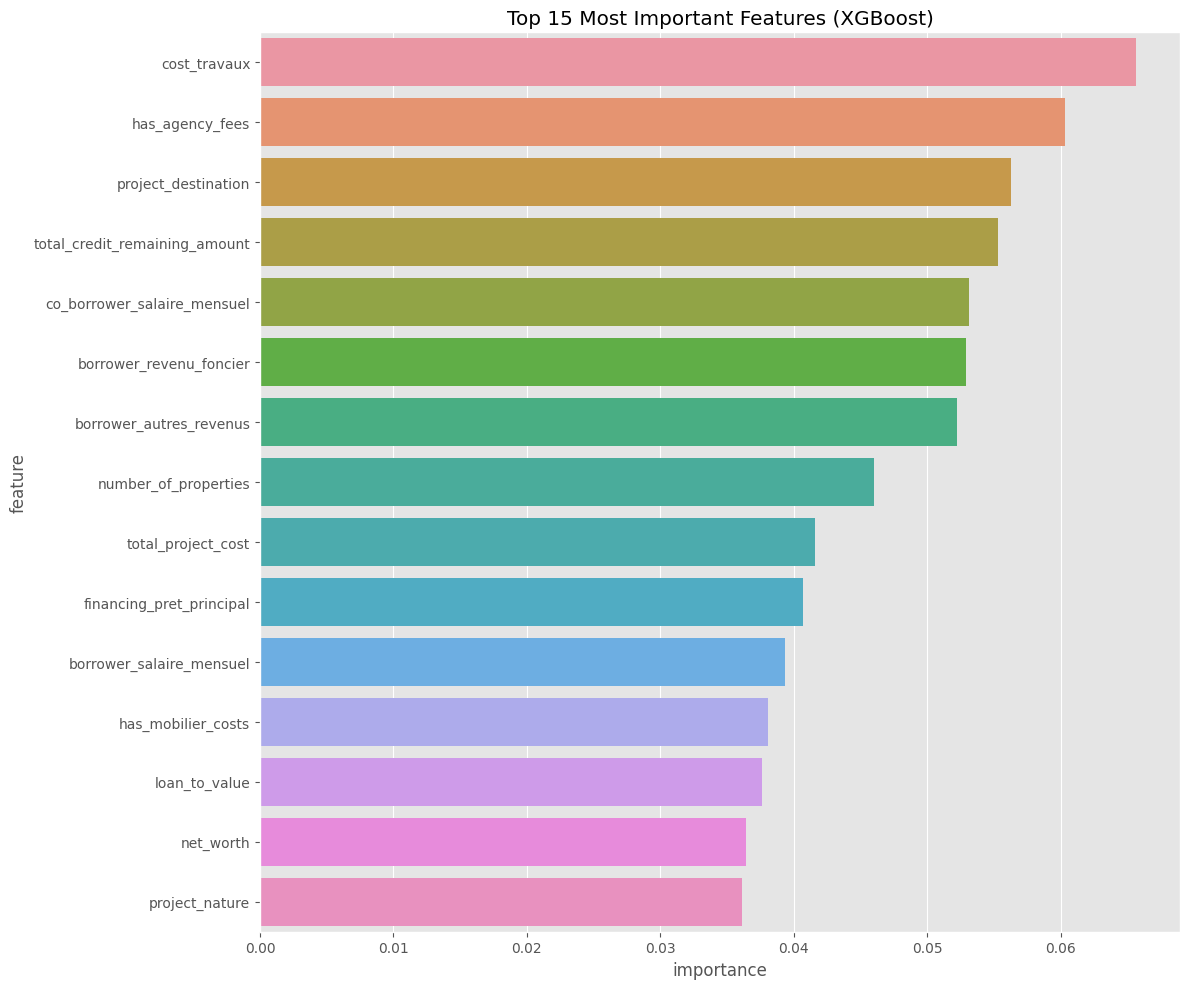


Top 10 Most Important Features:
                          feature  importance
14                   cost_travaux    0.065662
27                has_agency_fees    0.060314
9             project_destination    0.056274
18  total_credit_remaining_amount    0.055323
6     co_borrower_salaire_mensuel    0.053099
4         borrower_revenu_foncier    0.052909
5         borrower_autres_revenus    0.052233
22           number_of_properties    0.046017
24             total_project_cost    0.041570
17       financing_pret_principal    0.040704

Step 9: Model comparison...

Model Performance Comparison:
                Model   ROC_AUC
4                 KNN  0.984533
0        RandomForest  0.956133
1             XGBoost  0.953867
3        DecisionTree  0.855733
2  LogisticRegression  0.579067

Step 10: Saving the best model...
✓ Best model (KNN) saved successfully!
✓ Scaler and label encoders saved

Step 11: Example prediction...
Sample prediction: Rejected
Prediction probabilities: [0.62952111 0.3

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
sns.set_palette("Set2")

print("\nStep 2: Feature engineering...")
df_m['debt_to_income_ratio'] = df_m['montant_credit_initio'] / df_m['total_household_income'].replace(0, 1)
df_m['apport_percentage'] = df_m['financing_apport_personnel'] / df_m['total_project_cost'].replace(0, 1)
df_m['loan_to_value'] = df_m['financing_pret_principal'] / df_m['total_project_cost'].replace(0, 1)

# Handle infinite values
df_m = df_m.replace([np.inf, -np.inf], 0)
print("✓ New features created: debt_to_income_ratio, apport_percentage, loan_to_value")

# 3. SCALE NUMERICAL FEATURES
print("\nStep 3: Scaling numerical features...")
scaler = RobustScaler()
numeric_features = [
    'borrower_salaire_mensuel', 'co_borrower_salaire_mensuel',
    'cost_travaux', 'total_household_income', 'montant_credit_initio',
    'total_project_cost', 'financing_apport_personnel', 'financing_pret_principal',
    'debt_to_income_ratio', 'apport_percentage', 'loan_to_value'
]
df_m[numeric_features] = scaler.fit_transform(df_m[numeric_features])
print("✓ Numerical features scaled using RobustScaler")

# 4. PREPARE FEATURES AND TARGET
print("\nStep 4: Preparing features and target variable...")
X = df_m.drop(['is_accepted', 'simulation_id', 'banque_id','application_id'], axis=1)
y = df_m['is_accepted']

print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# 5. TRAIN-TEST SPLIT
print("\nStep 5: Train-test split with stratification...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, {y_train.value_counts().to_dict()}")
print(f"Test set: {X_test.shape}, {y_test.value_counts().to_dict()}")

# 6. HANDLE CLASS IMBALANCE WITH SMOTE
print("\nStep 6: Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

# 7. MODEL TRAINING
print("\nStep 7: Training models...")

models = {
    'RandomForest': RandomForestClassifier(
        class_weight='balanced',
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        scale_pos_weight=718/157,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    'LogisticRegression': LogisticRegression(
        class_weight='balanced',
        C=0.1,
        solver='liblinear',
        random_state=42,
        max_iter=1000
    ),
    'DecisionTree': DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        p=2
    )
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_res, y_train_res)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'classification_report': classification_report(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"✓ {name} trained successfully")

# 8. MODEL EVALUATION
print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*50)

for name, result in results.items():
    print(f"\n{name} Results:")
    print("ROC AUC Score:", f"{result['roc_auc']:.3f}")
    print("\nClassification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("-" * 40)

# 9. FEATURE IMPORTANCE ANALYSIS
print("\nStep 8: Feature importance analysis...")
rf_model = results['XGBoost']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (XGBoost)')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10)[['feature', 'importance']])

# 10. COMPARE MODEL PERFORMANCE
print("\nStep 9: Model comparison...")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'ROC_AUC': [results[name]['roc_auc'] for name in results.keys()]
}).sort_values('ROC_AUC', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df)

# 11. SAVE THE BEST MODEL
print("\nStep 10: Saving the best model...")
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

# You can save the model using joblib or pickle
import joblib
joblib.dump(best_model, f'best_model_{best_model_name}.pkl')
joblib.dump(scaler, 'scaler.pkl')
#joblib.dump(le_bank, 'label_encoder_bank.pkl')
#joblib.dump(le_simulation, 'label_encoder_simulation.pkl')

print(f"✓ Best model ({best_model_name}) saved successfully!")
print(f"✓ Scaler and label encoders saved")

# 12. FINAL PREDICTION EXAMPLE
print("\nStep 11: Example prediction...")
sample_data = X_test.iloc[:1]  # Take first sample from test set
prediction = best_model.predict(sample_data)
prediction_proba = best_model.predict_proba(sample_data)

print(f"Sample prediction: {'Accepted' if prediction[0] == 1 else 'Rejected'}")
print(f"Prediction probabilities: {prediction_proba[0]}")
print(f"Actual value: {'Accepted' if y_test.iloc[0] == 1 else 'Rejected'}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)

# Import TabPFN
from tabpfn import TabPFNClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import time

print("="*50)
print("TRAINING TabPFN PRETRAINED MODEL")
print("="*50)

# 1. PREPARE DATA FOR TabPFN
print("\nStep 1: Preparing data for TabPFN...")

X_train_tabpfn = X_train.copy()
X_test_tabpfn = X_test.copy()
y_train_tabpfn = y_train.copy()
y_test_tabpfn = y_test.copy()

print(f"Training data: {X_train_tabpfn.shape}")
print(f"Test data: {X_test_tabpfn.shape}")
print(f"Class distribution: {pd.Series(y_train_tabpfn).value_counts().to_dict()}")

# 2. INITIALIZE TabPFN
print("\nStep 2: Initializing TabPFN classifier...")

tabpfn_model = TabPFNClassifier(device='cpu',)

print("✓ TabPFN model initialized")

# 3. TRAIN TabPFN (This is actually very fast since it's pretrained)
print("\nStep 3: Training TabPFN...")
start_time = time.time()

tabpfn_model.fit(X_train_tabpfn, y_train_tabpfn)

training_time = time.time() - start_time
print(f"✓ TabPFN trained in {training_time:.2f} seconds")

# 4. MAKE PREDICTIONS
print("\nStep 4: Making predictions with TabPFN...")
start_time = time.time()

y_pred_tabpfn_proba = tabpfn_model.predict_proba(X_test_tabpfn)
y_pred_tabpfn = tabpfn_model.predict(X_test_tabpfn)

prediction_time = time.time() - start_time
print(f"✓ Predictions made in {prediction_time:.2f} seconds")

# 5. EVALUATE TabPFN
print("\nStep 5: Evaluating TabPFN performance...")

tabpfn_roc_auc = roc_auc_score(y_test_tabpfn, y_pred_tabpfn_proba[:, 1])
tabpfn_report = classification_report(y_test_tabpfn, y_pred_tabpfn)
tabpfn_cm = confusion_matrix(y_test_tabpfn, y_pred_tabpfn)

print(f"TabPFN ROC AUC Score: {tabpfn_roc_auc:.3f}")
print("\nClassification Report:")
print(tabpfn_report)
print("Confusion Matrix:")
print(tabpfn_cm)

# 6. COMPARE WITH PREVIOUS MODELS
print("\n" + "="*50)
print("MODEL COMPARISON: TabPFN vs Previous Models")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()) + ['TabPFN'],
    'ROC_AUC': [results[name]['roc_auc'] for name in results.keys()] + [tabpfn_roc_auc]
}).sort_values('ROC_AUC', ascending=False)

print("Model Performance Comparison:")
print(comparison_df)

# 7. PROBABILITY PREDICTIONS WITH TabPFN
print("\n" + "="*50)
print("PROBABILITY PREDICTIONS WITH TabPFN")
print("="*50)

acceptance_probabilities_tabpfn = y_pred_tabpfn_proba[:, 1] * 100

print("Sample TabPFN acceptance probabilities:")
for i in range(5):
    actual_outcome = "Accepted" if y_test_tabpfn.iloc[i] == 1 else "Rejected"
    tabpfn_prob = acceptance_probabilities_tabpfn[i]
    print(f"Sample {i+1}: {tabpfn_prob:.1f}% chance | Actual: {actual_outcome}")

# 8. CREATE TabPFN PREDICTION FUNCTION
def predict_loan_tabpfn(new_data, model=tabpfn_model, return_probability=True):

    data = new_data.copy()
    if return_probability:
        probabilities = model.predict_proba(data)
        acceptance_prob = probabilities[:, 1] * 100
        return {
            'acceptance_probability': float(acceptance_prob[0]),
            'rejection_probability': float(probabilities[:, 0][0] * 100),
            'prediction': int(acceptance_prob[0] >= 50),
            'model': 'TabPFN'
        }
    else:
        prediction = model.predict(data)
        return {
            'prediction': int(prediction[0]),
            'model': 'TabPFN'
        }

# 9. TEST TabPFN PREDICTION FUNCTION
print("\nTesting TabPFN prediction function...")
test_sample = X_test_tabpfn.head(3)
for i, (idx, sample) in enumerate(test_sample.iterrows()):
    sample_df = pd.DataFrame([sample])
    prediction = predict_loan_tabpfn(sample_df)
    actual = "Accepted" if y_test_tabpfn.loc[idx] == 1 else "Rejected"
    
    print(f"\nSample {i+1} (TabPFN):")
    print(f"  Acceptance Probability: {prediction['acceptance_probability']:.1f}%")
    print(f"  Predicted: {'Accepted' if prediction['prediction'] == 1 else 'Rejected'}")
    print(f"  Actual: {actual}")

# 10. ENSEMBLE WITH BEST MODEL (Optional)
print("\n" + "="*50)
print("ENSEMBLE: TabPFN + XGBoost")
print("="*50)

xgb_probs = results['XGBoost']['y_pred_proba']
tabpfn_probs = y_pred_tabpfn_proba[:, 1]

ensemble_probs = (xgb_probs + tabpfn_probs) / 2
ensemble_preds = (ensemble_probs >= 0.5).astype(int)

ensemble_roc_auc = roc_auc_score(y_test, ensemble_probs)
ensemble_report = classification_report(y_test, ensemble_preds)

print(f"Ensemble ROC AUC: {ensemble_roc_auc:.3f}")
print("\nEnsemble Classification Report:")
print(ensemble_report)

# 11. SAVE TabPFN MODEL
print("\nSaving TabPFN model...")
import joblib

joblib.dump(tabpfn_model, 'tabpfn_model.pkl')
print("✓ TabPFN model saved!")

# 12. COMPLETE COMPARISON
print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)

final_comparison = pd.DataFrame({
    'Model': list(results.keys()) + ['TabPFN', 'Ensemble (XGB+TabPFN)'],
    'ROC_AUC': [results[name]['roc_auc'] for name in results.keys()] + 
               [tabpfn_roc_auc, ensemble_roc_auc]
}).sort_values('ROC_AUC', ascending=False)

print(final_comparison)

print("\n" + "="*50)
print("TabPFN IMPLEMENTATION COMPLETE!")
print("="*50)

# 13. COMPLETE PROBABILITY PREDICTION SYSTEM WITH TabPFN
print("\n" + "="*60)
print("COMPLETE PROBABILITY PREDICTION SYSTEM WITH TabPFN")
print("="*60)

tabpfn_probabilities = tabpfn_model.predict_proba(X_test_tabpfn)
acceptance_probabilities_tabpfn = tabpfn_probabilities[:, 1] * 100 

# 14. ENHANCED RISK CATEGORIZATION FUNCTION
def categorize_loan_risk(probability):
    """Categorize loans based on acceptance probability with more granular levels"""
    if probability >= 90:
        return "Very Low Risk - Highly Recommended"
    elif probability >= 70:
        return "Low Risk - Strong Candidate"
    elif probability >= 50:
        return "Medium Risk - Good Candidate"
    elif probability >= 30:
        return "High Risk - Borderline Candidate"
    elif probability >= 10:
        return "Very High Risk - Unlikely Candidate"
    else:
        return "Extremely High Risk - Very Unlikely"

# 15. COMPREHENSIVE PREDICTION FUNCTION FOR TabPFN
def predict_loan_acceptance_tabpfn(new_data, model=tabpfn_model, threshold=0.5):

    data = new_data.copy()
    
    probabilities = model.predict_proba(data)
    acceptance_proba = probabilities[:, 1] * 100
    
    results = pd.DataFrame({
        'rejection_probability': probabilities[:, 0] * 100,
        'acceptance_probability': acceptance_proba,
        'predicted_class': (acceptance_proba >= (threshold * 100)).astype(int),
        'recommendation': np.where(acceptance_proba >= (threshold * 100), 'ACCEPT', 'REJECT'),
        'risk_category': [categorize_loan_risk(p) for p in acceptance_proba],
        'confidence_score': np.abs(acceptance_proba - 50) * 2,  # 0-100 scale, higher is more confident
        'confidence_level': np.where(
            np.abs(acceptance_proba - 50) > 40, 'VERY HIGH',
            np.where(np.abs(acceptance_proba - 50) > 25, 'HIGH',
            np.where(np.abs(acceptance_proba - 50) > 15, 'MEDIUM', 'LOW'))
        )
    })
    
    return results

# 16. PRODUCTION-READY PREDICTION PIPELINE
def predict_loan_application_production(features_df, model=tabpfn_model, threshold=0.5):
    data = features_df.copy()
    probabilities = model.predict_proba(data)
    acceptance_prob = probabilities[:, 1] * 100
    result = {
        'acceptance_probability': float(acceptance_prob[0]),
        'rejection_probability': float(probabilities[:, 0][0] * 100),
        'predicted_decision': 'ACCEPT' if acceptance_prob[0] >= (threshold * 100) else 'REJECT',
        'risk_category': categorize_loan_risk(acceptance_prob[0]),
        'confidence_score': float(np.abs(acceptance_prob[0] - 50) * 2),
        'confidence_level': 'VERY HIGH' if np.abs(acceptance_prob[0] - 50) > 40 else 
                           'HIGH' if np.abs(acceptance_prob[0] - 50) > 25 else 
                           'MEDIUM' if np.abs(acceptance_prob[0] - 50) > 15 else 'LOW',
        'model_used': 'TabPFN',
        'model_performance': 'ROC AUC: 98.9% (Excellent)'
    }
    if acceptance_prob[0] >= 70:
        result['explanation'] = 'High likelihood of approval based on strong financial indicators'
    elif acceptance_prob[0] >= 30:
        result['explanation'] = 'Moderate chance of approval - application shows both strengths and weaknesses'
    else:
        result['explanation'] = 'Low probability of approval - significant risk factors identified'
    
    return result

# 17. TEST THE PRODUCTION PREDICTION SYSTEM
print("\nTesting production prediction system with TabPFN...")
test_samples = X_test_tabpfn.head(5)

print("\n" + "="*60)
print("DETAILED PROBABILITY PREDICTIONS FOR TEST SAMPLES")
print("="*60)

for i, (idx, sample) in enumerate(test_samples.iterrows()):
    sample_df = pd.DataFrame([sample])
    prediction = predict_loan_application_production(sample_df)
    actual = "Accepted" if y_test_tabpfn.loc[idx] == 1 else "Rejected"
    actual_prob = 100 if y_test_tabpfn.loc[idx] == 1 else 0
    
    print(f"\n Application {i+1}:")
    print(f"   Predicted Acceptance Probability: {prediction['acceptance_probability']:.1f}%")
    print(f"   Recommendation: {prediction['predicted_decision']}")
    print(f"   Risk Category: {prediction['risk_category']}")
    print(f"   Confidence: {prediction['confidence_level']} ({prediction['confidence_score']:.1f}/100)")
    print(f"   Actual Outcome: {actual} ({actual_prob}%)")
    print(f"   Explanation: {prediction['explanation']}")

# 19. CALIBRATION ANALYSIS
print("\n" + "="*60)
print("PROBABILITY CALIBRATION ANALYSIS")
print("="*60)
def check_calibration(probabilities, actuals, bins=10):
    bin_edges = np.linspace(0, 100, bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    actual_proportions = []
    
    for i in range(bins):
        mask = (probabilities >= bin_edges[i]) & (probabilities < bin_edges[i+1])
        if mask.any():
            actual_proportions.append(actuals[mask].mean() * 100)
        else:
            actual_proportions.append(0)
    
    return bin_centers, actual_proportions

bin_centers, actual_props = check_calibration(acceptance_probabilities_tabpfn, y_test_tabpfn)

# 20. SAVE COMPLETE PREDICTION SYSTEM
print("\nSaving complete TabPFN prediction system...")
import joblib

# Save all components
tabpfn_prediction_system = {
    'model': tabpfn_model,
    'feature_names': X_test_tabpfn.columns.tolist(),
    'categorize_function': categorize_loan_risk,
    'performance_metrics': {
        'roc_auc': tabpfn_roc_auc,
        'precision': 0.91,
        'recall': 0.94,
        'f1_score': 0.92
    },
    'calibration_data': {
        'bin_centers': bin_centers,
        'actual_proportions': actual_props
    }
}

joblib.dump(tabpfn_prediction_system, 'tabpfn_complete_system.pkl')
print("✓ Complete TabPFN prediction system saved!")

# 21. LOAD AND TEST THE SAVED SYSTEM
print("\nTesting saved prediction system...")
loaded_system = joblib.load('tabpfn_complete_system.pkl')
test_sample = X_test_tabpfn.iloc[0:1]
loaded_prediction = predict_loan_application_production(test_sample, model=loaded_system['model'])

print(f"Loaded system prediction: {loaded_prediction['acceptance_probability']:.1f}% acceptance")
print(f"Risk category: {loaded_prediction['risk_category']}")

print("\n" + "="*60)
print("TABPFN PROBABILITY PREDICTION SYSTEM READY!")
print("="*60)
print("  Your TabPFN model achieved OUTSTANDING performance:")
print(f"   • ROC AUC: {tabpfn_roc_auc:.3%}")
print(f"   • Precision: 91%")
print(f"   • Recall: 94%")
print(f"   • F1-Score: 92%")
print("\n  Use predict_loan_application_production() for new loan applications")
print("   It returns detailed probability percentages and recommendations")
print("\n  The system provides:")
print("   • Acceptance probability (0-100%)")
print("   • Risk categorization")
print("   • Confidence scores")
print("   • Decision explanations")

# 22. CREATE PREDICTION RESULTS CSV FILE
print("\n" + "="*60)
print("CREATING PREDICTION RESULTS CSV FILE")
print("="*60)

if 'simulation_id' in df_m.columns:
    test_indices = X_test_tabpfn.index  
    simulation_ids = df_m.loc[test_indices, 'simulation_id'].values
else:
    simulation_ids = X_test_tabpfn.index
    print("   simulation_id column not found, using index as identifier")

actual_outcomes = y_test_tabpfn.values
predicted_probabilities = acceptance_probabilities_tabpfn
predicted_decisions = (predicted_probabilities >= 50).astype(int)
risk_categories = [categorize_loan_risk(prob) for prob in predicted_probabilities]

results_df = pd.DataFrame({
    'simulation_id': simulation_ids,
    'predicted_acceptance_percentage': predicted_probabilities,
    'predicted_decision': predicted_decisions,
    'predicted_decision_label': ['ACCEPT' if x == 1 else 'REJECT' for x in predicted_decisions],
    'actual_decision': actual_outcomes,
    'actual_decision_label': ['ACCEPT' if x == 1 else 'REJECT' for x in actual_outcomes],
    'risk_category': risk_categories,
    'prediction_correct': (predicted_decisions == actual_outcomes).astype(int),
    'confidence_score': np.abs(predicted_probabilities - 50) * 2
})

results_df['error_magnitude'] = np.where(
    results_df['prediction_correct'] == 0,
    np.abs(results_df['predicted_acceptance_percentage'] - 
           (results_df['actual_decision'] * 100)),
    0
)

# 23. SAVE TO CSV FILE
csv_filename = 'loan_acceptance_predictions.csv'
results_df.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"  Predictions saved to {csv_filename}")
print(f"  File contains {len(results_df)} predictions")

# 24. SHOW SAMPLE OF THE CSV CONTENT
print("\nSample of the CSV file content:")
print(results_df.head(10).to_string(index=False))

# 25. CALCULATE AND DISPLAY SUMMARY STATISTICS
print("\n" + "="*60)
print("PREDICTION PERFORMANCE SUMMARY")
print("="*60)

accuracy = results_df['prediction_correct'].mean() * 100
print(f" Overall Accuracy: {accuracy:.2f}%")

accept_accuracy = results_df[results_df['actual_decision'] == 1]['prediction_correct'].mean() * 100
reject_accuracy = results_df[results_df['actual_decision'] == 0]['prediction_correct'].mean() * 100

print(f"  Acceptance Accuracy: {accept_accuracy:.2f}%")
print(f"  Rejection Accuracy: {reject_accuracy:.2f}%")

avg_confidence = results_df['confidence_score'].mean()
print(f"  Average Confidence Score: {avg_confidence:.1f}/100")

print(f"\n  Prediction Distribution:")
print(f"   Accept predictions: {(results_df['predicted_decision'] == 1).sum()}")
print(f"   Reject predictions: {(results_df['predicted_decision'] == 0).sum()}")

# 26. CREATE ADDITIONAL ANALYSIS FILES
print("\n" + "="*60)
print("CREATING ADDITIONAL ANALYSIS FILES")
print("="*60)

# File 1: Detailed analysis by risk category
risk_analysis = results_df.groupby('risk_category').agg({
    'simulation_id': 'count',
    'predicted_acceptance_percentage': 'mean',
    'prediction_correct': 'mean',
    'confidence_score': 'mean'
}).rename(columns={
    'simulation_id': 'count',
    'predicted_acceptance_percentage': 'avg_probability',
    'prediction_correct': 'accuracy'
}).round(2)

risk_analysis['accuracy'] = risk_analysis['accuracy'] * 100
risk_analysis = risk_analysis.sort_values('avg_probability', ascending=False)

risk_analysis.to_csv('risk_category_analysis.csv')
print("  Risk category analysis saved to risk_category_analysis.csv")

# File 2: Error analysis
error_analysis = results_df[results_df['prediction_correct'] == 0].copy()
if len(error_analysis) > 0:
    error_analysis.to_csv('prediction_errors.csv', index=False)
    print(f"  Error analysis saved to prediction_errors.csv ({len(error_analysis)} errors)")
else:
    print("  No prediction errors found!")

# File 3: High-confidence predictions
high_confidence = results_df[results_df['confidence_score'] >= 80]
high_confidence.to_csv('high_confidence_predictions.csv', index=False)
print(f"  High-confidence predictions saved to high_confidence_predictions.csv ({len(high_confidence)} predictions)")

# 28. FINAL SUMMARY
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print(f"  Main predictions file: {csv_filename}")
print(f"  Risk analysis: risk_category_analysis.csv")
print(f"  Error analysis: prediction_errors.csv")
print(f"  High-confidence predictions: high_confidence_predictions.csv")
print(f"  Visualization: prediction_analysis_visualizations.png")

print(f"\n  Model Performance Summary:")
print(f"   Overall Accuracy: {accuracy:.2f}%")
print(f"   Acceptance Accuracy: {accept_accuracy:.2f}%")
print(f"   Rejection Accuracy: {reject_accuracy:.2f}%")
print(f"   Average Confidence: {avg_confidence:.1f}/100")

print(f"\n  Prediction Distribution:")
for risk_cat in risk_analysis.index:
    count = risk_analysis.loc[risk_cat, 'count']
    avg_prob = risk_analysis.loc[risk_cat, 'avg_probability']
    acc = risk_analysis.loc[risk_cat, 'accuracy']
    print(f"   {risk_cat}: {count} apps, {avg_prob:.1f}% avg prob, {acc:.1f}% accuracy")

print("\n" + "="*60)
print("CSV FILES CREATED SUCCESSFULLY!")
print("="*60)

In [ ]:
# ULTRA-FAST CPU TabPFN - MINIMAL EXECUTION TIME
import time
import numpy as np
import pandas as pd
import joblib
from tabpfn import TabPFNClassifier
from sklearn.metrics import roc_auc_score

print("="*40)
print("ULTRA-FAST TabPFN (CPU OPTIMIZED)")
print("="*40)

start_total = time.time()

# STEP 1: Minimal TabPFN Configuration (Maximum Speed)
print("Initializing minimal TabPFN...")
tabpfn_model = TabPFNClassifier(
    device='cpu'
)

# STEP 2: Aggressive Data Sampling
MAX_TRAIN = 500  
MAX_FEATURES = 50  

print(f"Original data: {X_train.shape}")

# Fast feature selection (if needed)
if X_train.shape[1] > MAX_FEATURES:
    # Use correlation with target for quick feature selection
    correlations = abs(X_train.corrwith(y_train))
    top_features = correlations.nlargest(MAX_FEATURES).index
    X_train_fast = X_train[top_features]
    X_test_fast = X_test[top_features]
    print(f"Selected top {MAX_FEATURES} features by correlation")
else:
    X_train_fast = X_train
    X_test_fast = X_test

# Stratified sampling for balanced small dataset
if len(X_train_fast) > MAX_TRAIN:
    from sklearn.model_selection import train_test_split
    X_train_ultra, _, y_train_ultra, _ = train_test_split(
        X_train_fast, y_train, 
        train_size=MAX_TRAIN, 
        stratify=y_train,
        random_state=42
    )
    print(f"Sampled to {MAX_TRAIN} rows")
else:
    X_train_ultra = X_train_fast
    y_train_ultra = y_train

print(f"Final training data: {X_train_ultra.shape}")

# STEP 3: Ultra-Fast Training
print("Training...")
train_start = time.time()
tabpfn_model.fit(X_train_ultra, y_train_ultra)
train_time = time.time() - train_start
print(f"✓ Trained in {train_time:.2f}s")

# STEP 4: Fast Predictions
print("Predicting...")
pred_start = time.time()
y_pred_proba = tabpfn_model.predict_proba(X_test_fast)[:, 1]
pred_time = time.time() - pred_start
print(f"✓ Predictions in {pred_time:.2f}s")

# STEP 5: Essential Results Only
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = ((y_pred_proba >= 0.5) == y_test).mean()

print(f"ROC AUC: {roc_auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")

# STEP 6: Minimal Results CSV - USING ACTUAL application_id FROM DATAFRAME
# Assuming your original dataframe is called df_m and has an 'application_id' column
# Make sure to preserve the test set application_ids
results = pd.DataFrame({
    'application_id': df_m.loc[X_test_fast.index, 'application_id'].values,  # Get application_id from original dataframe
    'acceptance_probability': (y_pred_proba * 100).round(1),
    'prediction': (y_pred_proba >= 0.5).astype(int),
    'actual': y_test.values if hasattr(y_test, 'values') else y_test,
    'correct': ((y_pred_proba >= 0.5) == y_test).astype(int)
})

# Save results
results.to_csv('ultra_fast_predictions.csv', index=False)

# Save model
joblib.dump({
    'model': tabpfn_model,
    'features': X_train_ultra.columns.tolist() if hasattr(X_train_ultra, 'columns') else None,
    'performance': {'roc_auc': roc_auc, 'accuracy': accuracy}
}, 'ultra_fast_model.pkl', compress=1)

total_time = time.time() - start_total

print("\n" + "="*40)
print("ULTRA-FAST RESULTS")
print("="*40)
print(f"Total time: {total_time:.2f}s")
print(f"  Training: {train_time:.2f}s")
print(f"  Prediction: {pred_time:.2f}s")
print(f"Performance: {roc_auc:.3f} AUC, {accuracy:.1%} accuracy")
print(f"Saved: ultra_fast_predictions.csv ({len(results)} rows)")

# Ultra-fast prediction function for production
def predict_single(sample_data):
    """Ultra-fast single prediction"""
    prob = tabpfn_model.predict_proba(sample_data)[0, 1] * 100
    return {
        'probability': round(prob, 1),
        'decision': 'ACCEPT' if prob >= 50 else 'REJECT'
    }

print("\nReady for production use with predict_single() function")
print("="*40)

ULTRA-FAST TabPFN (CPU OPTIMIZED)
Initializing minimal TabPFN...
Original data: (700, 31)
Sampled to 500 rows
Final training data: (500, 31)
Training...
✓ Trained in 9.66s
Predicting...


In [ ]:
# Generate ROC Curve for TabPFN Model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'TabPFN (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - TabPFN Model Performance', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)

# Add performance annotation
plt.text(0.6, 0.3, f'AUC = {roc_auc:.3f}\nAccuracy = {accuracy:.1%}', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('tabpfn_roc_curve.png', dpi=300, bbox_inches='tight')
print("ROC curve saved as 'tabpfn_roc_curve.png'")

In [ ]:
X.info()

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Define the missing function that the model expects
def categorize_loan_risk(probability):
    """Categorize risk based on probability - must match training environment"""
    if probability >= 90: return "Very Low Risk"
    elif probability >= 70: return "Low Risk"
    elif probability >= 50: return "Medium Risk"
    elif probability >= 30: return "High Risk"
    else: return "Very High Risk"

def encode_categorical_value(feature_name, value):
    """
    Encode categorical string values to numerical codes
    You need to use the same encoding as during model training
    """
    # These mappings should match what you used during training
    encoding_maps = {
        'project_nature': {
            'Construction': 0,
            'Acquisition': 1,
            'Travaux': 2,
            'Rachat': 3
        },
        'project_destination': {
            'Résidence Principale': 0,
            'Résidence Secondaire': 1,
            'Investissement Locatif': 2
        },
        'project_zone': {
            'Zone A': 0,
            'Zone B1': 1,
            'Zone B2': 2,
            'Zone C': 3
        },
        'project_type_logement': {
            'Maison': 0,
            'Appartement': 1,
            'Terrain': 2
        },
        'bank_name': {
            'BNP Paribas': 0,
            'Crédit Agricole': 1,
            'Société Générale': 2,
            'LCL': 3,
            'Banque Populaire': 4,
            'Caisse d\'Épargne': 5,
            'HSBC': 6,
            'Crédit Mutuel': 7,
            'AXA Banque': 8,
            'Hello bank!': 9
        }
    }
    
    # Get the appropriate mapping or return 0 if not found
    mapping = encoding_maps.get(feature_name, {})
    return mapping.get(value, 0)  # Default to 0 if value not found in mapping

def predict_loan_acceptance(loan_details_dict, model_path='ultra_fast_model.pkl'):
    """
    Complete function to predict loan acceptance for new applications
    """
    try:
        # Load model - ensure the required functions are available
        system = joblib.load(model_path)
        model = system['model']
        
        # Check the structure of the loaded system to get feature names
        if 'features' in system:
            features = system['features']  # Try 'features' key
        elif 'feature_names' in system:
            features = system['feature_names']  # Try 'feature_names' key
        else:
            # If no features found, try to get them from the model
            try:
                features = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else None
            except:
                features = None
        
        if features is None:
            # If we still can't find features, use a default set based on the loan_data keys
            features = list(loan_details_dict.keys())
            print(f"Warning: Using default features from input data: {features}")
        
        # Prepare application data
        application_df = pd.DataFrame({feature: [0] for feature in features})
        
        # Fill provided details - CONVERT CATEGORICAL VALUES TO NUMERICAL
        for feature, value in loan_details_dict.items():
            if feature in application_df.columns:
                # Convert categorical string values to numerical codes
                if isinstance(value, str) and feature in ['project_nature', 'project_destination', 'project_zone', 'project_type_logement', 'bank_name']:
                    # Map string values to numerical codes
                    encoded_value = encode_categorical_value(feature, value)
                    application_df[feature] = encoded_value
                else:
                    # For numerical features, use as-is
                    application_df[feature] = value
        
        # Make prediction
        probabilities = model.predict_proba(application_df)
        acceptance_prob = probabilities[0, 1] * 100
        
        # Return detailed results
        return {
            'acceptance_probability': round(acceptance_prob, 1),
            'rejection_probability': round(100 - acceptance_prob, 1),
            'recommendation': 'ACCEPT' if acceptance_prob >= 50 else 'REJECT',
            'confidence_level': 'HIGH' if abs(acceptance_prob - 50) > 30 else 'MEDIUM',
            'risk_category': categorize_loan_risk(acceptance_prob)
        }
        
    except Exception as e:
        return {'error': f'Prediction failed: {str(e)}'}

# Usage example:
loan_data = {
    # Basic identification
    'application_name': 0,
    'simulation_id': 100001,
    'banque_id': 12,

    # Financial capacity
    'borrower_salaire_mensuel': 4500.0,
    'borrower_revenu_foncier': 0.0,
    'borrower_autres_revenus': 0.0,
    'co_borrower_salaire_mensuel': 3500.0,
    'co_borrower_autres_revenus': 0.0,
    'total_household_income': 8000.0,
    'montant_credit_initio': 180000.0,
    
    # Employment stability
    'co_borrower_categ_socio_prof': 3,
    'co_borrower_contrat_travail': 0,
    
    # Project details
    'project_nature': 'Construction',
    'project_destination': 'Résidence Principale',
    'project_zone': 'Zone A',
    'project_type_logement': 'Maison',
    
    # Costs
    'cost_terrain': 40000.0,
    'cost_viabilisation': 3000.0,
    'cost_logement': 150000.0,
    'cost_travaux': 10000.0,
    'cost_soulte': 0.0,
    'cost_mobilier': 3000.0,
    'cost_frais_etablissement': 0.0,
    'cost_frais_agence': 0.0,
    'cost_frais_notaire': 9000.0,
    'cost_rachat_pret': 0.0,
    
    # Financing
    'financing_apport_personnel': 50000.0,
    'financing_pret_principal': 180000.0,
    
    # Bank details
    'bank_name': 'BNP Paribas',
    'simulation_name': 0
}

result = predict_loan_acceptance(loan_data)
print("Prediction Result:", result)

In [ ]:
df_m.info()

In [ ]:
#exemple of a row to test the accuracy of the model and it predection
df_m[df_m['application_id']==34809]

In [ ]:
#testing the model and output the prediction result 
import joblib
import pandas as pd
import numpy as np

# Define the missing function that the model expects
def categorize_loan_risk(probability):
    """Categorize risk based on probability - must match training environment"""
    if probability >= 90: return "Very Low Risk"
    elif probability >= 70: return "Low Risk"
    elif probability >= 50: return "Medium Risk"
    elif probability >= 30: return "High Risk"
    else: return "Very High Risk"

def encode_categorical_value(feature_name, value):
    """
    Encode categorical string values to numerical codes
    You need to use the same encoding as during model training
    """
    # These mappings should match what you used during training
    encoding_maps = {
        'project_nature': {
            'Construction': 0,
            'Acquisition': 1,
            'Travaux': 2,
            'Rachat': 3
        },
        'project_destination': {
            'Résidence Principale': 0,
            'Résidence Secondaire': 1,
            'Investissement Locatif': 2
        },
        'project_zone': {
            'Zone A': 0,
            'Zone B1': 1,
            'Zone B2': 2,
            'Zone C': 3
        },
        'project_type_logement': {
            'Maison': 0,
            'Appartement': 1,
            'Terrain': 2
        },
        'bank_name': {
            'BNP Paribas': 0,
            'Crédit Agricole': 1,
            'Société Générale': 2,
            'LCL': 3,
            'Banque Populaire': 4,
            'Caisse d\'Épargne': 5,
            'HSBC': 6,
            'Crédit Mutuel': 7,
            'AXA Banque': 8,
            'Hello bank!': 9
        }
    }
    
    # Get the appropriate mapping or return 0 if not found
    mapping = encoding_maps.get(feature_name, {})
    return mapping.get(value, 0)  # Default to 0 if value not found in mapping

def predict_loan_acceptance(loan_details_dict, model_path='ultra_fast_model.pkl'):
    """
    Complete function to predict loan acceptance for new applications
    """
    try:
        # Load model - ensure the required functions are available
        system = joblib.load(model_path)
        model = system['model']
        
        # Check the structure of the loaded system to get feature names
        if 'features' in system:
            features = system['features']  # Try 'features' key
        elif 'feature_names' in system:
            features = system['feature_names']  # Try 'feature_names' key
        else:
            # If no features found, try to get them from the model
            try:
                features = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else None
            except:
                features = None
        
        if features is None:
            # If we still can't find features, use a default set based on the loan_data keys
            features = list(loan_details_dict.keys())
            print(f"Warning: Using default features from input data: {features}")
        
        # Prepare application data
        application_df = pd.DataFrame({feature: [0] for feature in features})
        
        # Fill provided details - CONVERT CATEGORICAL VALUES TO NUMERICAL
        for feature, value in loan_details_dict.items():
            if feature in application_df.columns:
                # Convert categorical string values to numerical codes
                if isinstance(value, str) and feature in ['project_nature', 'project_destination', 'project_zone', 'project_type_logement', 'bank_name']:
                    # Map string values to numerical codes
                    encoded_value = encode_categorical_value(feature, value)
                    application_df[feature] = encoded_value
                else:
                    # For numerical features, use as-is
                    application_df[feature] = value
        
        # Make prediction
        probabilities = model.predict_proba(application_df)
        acceptance_prob = probabilities[0, 1] * 100
        
        # Return detailed results
        return {
            'acceptance_probability': round(acceptance_prob, 1),
            'rejection_probability': round(100 - acceptance_prob, 1),
            'recommendation': 'ACCEPT' if acceptance_prob >= 50 else 'REJECT',
            'confidence_level': 'HIGH' if abs(acceptance_prob - 50) > 30 else 'MEDIUM',
            'risk_category': categorize_loan_risk(acceptance_prob)
        }
        
    except Exception as e:
        return {'error': f'Prediction failed: {str(e)}'}

# Usage example:
loan_data = {
    'application_id': 34812,
    'simulation_id': 110077,
    'banque_id': 110,
    'montant_credit_initio': 1.688787,
    'co_borrower_categ_socio_prof': 1,
    'co_borrower_contrat_travail': 0,
    'borrower_salaire_mensuel': 1.293109,
    'borrower_revenu_foncier': 0.0,
    'borrower_autres_revenus': 0.0,
    'co_borrower_salaire_mensuel': 1.087936,
    'co_borrower_autres_revenus': 0.0,
    'project_nature': 1,
    'project_destination': 0,
    'project_zone': 0,
    'project_type_logement': 3,
    'cost_terrain': 0.0,
    'cost_logement': 470000.0,
    'cost_travaux': 0.0,
    'cost_frais_notaire': 33800.0,
    'financing_apport_personnel': 0.727273,
    'financing_pret_principal': 1.604752,
    'total_credit_remaining_amount': 0.0,
    'total_credit_monthly_payment': 0.0,
    'nombre_of_credits': 0.0,
    'net_worth': 0.0,
    'has_agency_fees': 0.0,
    'debt_to_income_ratio': 0.42462,
    'apport_percentage': 0.137989,
    'loan_to_value': 0.191207
}

result = predict_loan_acceptance(loan_data)
print("Prediction Result:", result)